In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Statistics for "Survived" column:
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64




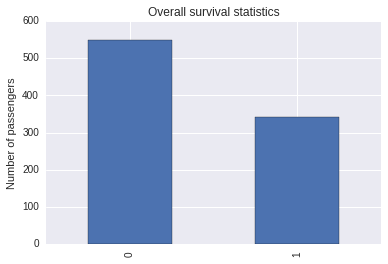

In [4]:
# Plot and describe overall survival statistics
print 'Statistics for "Survived" column:'
print train['Survived'].describe()
print '\n'

plt.title('Overall survival statistics')
plt.ylabel('Number of passengers')
train.Survived.value_counts().plot(kind='bar')
plt.show()

# Question:
What factors made people more likely to survive?

# Data wrangling phase

In [5]:
# Drop useless columns
train.pop('Name')
train.pop('Ticket')
train.pop('Cabin')

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Let's map data with a lot of different values to buckets. Specifically, I want to analyze:  
1) Survival by age groups. Here, mapping from continuous values to age buckets will help. I will map ages to 8 buckets: '0-10', '10-20', ... '70+'  
2) Survival percentage by fare. I will map fares to 2 buckets: cheap tickets (fare <= 50) and expensive ones (fare > 50)  
3) Survival percentage by "SibSp" parameter. Specifically, I want to look if passenger having a sibling / spouse on board had better chances of survival. So, I will map values to 2 buckets: had SibSp (SibSp >=1) or did not (SibSp = 0)  
4) Survival percengtege by "Parch" parameter. Specifically, I want to look if passenger having a parent / chilredn on had better chances of survival. So, I will map values t0 2 buckets: had Parch (Parch > =1) or did not (Parch = 0)

In [6]:
# Map ages to age buckets
def map_ages(age):
    if (age >= 0) and (age <= 10):
        return '0-10'
    if (age > 10) and (age <= 20):
        return '10-20'
    if (age > 20) and (age <= 30):
        return '20-30'
    if (age > 30) and (age <= 40):
        return '30-40'
    if (age > 40) and (age <= 50):
        return '40-50'
    if (age > 50) and (age <= 60):
        return '50-60'
    if (age > 60) and (age <= 70):
        return '60-70'
    if (age > 70):
        return '70+'
    else:
        return 'N/A'

In [7]:
# Map SibSp parameter to 2 buckets
def had_sibsp(sibsp):
    if (sibsp == 0):
        return 'no'
    else:
        return 'yes'

In [8]:
# Map Parch paramter to 2 buckets
def had_parch(parch):
    if (parch == 0):
        return 'no'
    else:
        return 'yes'

In [9]:
# Map ticket fares into 2 buckets
def map_fare(fare):
    if (fare <= 50):
        return 'cheap'
    else:
        return 'expensive'

In [10]:
# Transform columns
train['Age'] = train['Age'].apply(map_ages)
train['Parch'] = train['Parch'].apply(had_parch)
train['SibSp'] = train['SibSp'].apply(had_sibsp)
train['Fare'] = train['Fare'].apply(map_fare)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,20-30,yes,no,cheap,S
1,2,1,1,female,30-40,yes,no,expensive,C
2,3,1,3,female,20-30,no,no,cheap,S
3,4,1,1,female,30-40,yes,no,expensive,S
4,5,0,3,male,30-40,no,no,cheap,S


# Exploration phase

In [11]:
# Explore data for a column
def explore(column):
    # Print some statisticcs
    print 'Statistics:'
    print train[column].describe()
    print '\n'
    
    # Group by column
    groupby = train.groupby(by=column)
    
    # Print data distribution
    print 'Distribution:'
    print groupby.count()['Survived']
    print '\n'
    
    # Plot survival percentages
    plt.title('Survival by ' + column)
    plt.ylabel('Survival percentage')
    groupby.mean()['Survived'].plot(kind='bar')
    plt.show()

Statistics:
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


Distribution:
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64




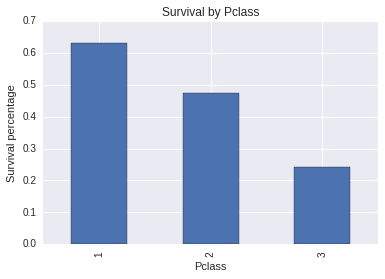

In [12]:
explore('Pclass')

Looks like first class passengers were most likely to survive, perhaps they were given preference for lifeboats

Looks like first class passengers were most likely to survive, perhaps they were given preference for lifeboats

Statistics:
count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


Distribution:
Sex
female    314
male      577
Name: Survived, dtype: int64




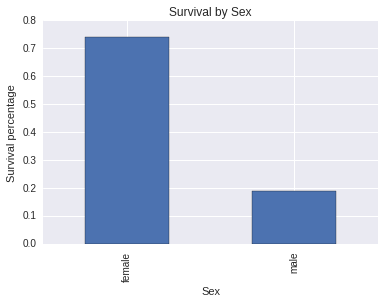

In [13]:
explore ('Sex')

Women were more likely to survive, probably they were evacuated first along with children

Statistics:
count       891
unique        9
top       20-30
freq        230
Name: Age, dtype: object


Distribution:
Age
0-10      64
10-20    115
20-30    230
30-40    155
40-50     86
50-60     42
60-70     17
70+        5
N/A      177
Name: Survived, dtype: int64




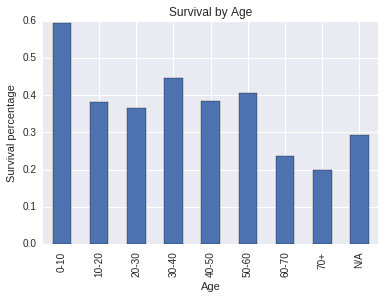

In [14]:
explore('Age')

Looks like kids (ages 0-10) were more likely to survive (probably because of 'women and children first' rule) and seniors (60+) were less likely to survive

Statistics:
count     891
unique      2
top        no
freq      608
Name: SibSp, dtype: object


Distribution:
SibSp
no     608
yes    283
Name: Survived, dtype: int64




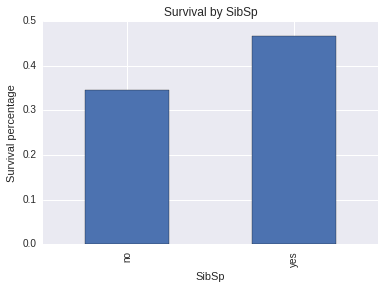

In [15]:
explore ('SibSp')

Looks like passengers with siblings and spouses on board were more likely to survive - perhaps some preference were given to families

Statistics:
count     891
unique      2
top        no
freq      678
Name: Parch, dtype: object


Distribution:
Parch
no     678
yes    213
Name: Survived, dtype: int64




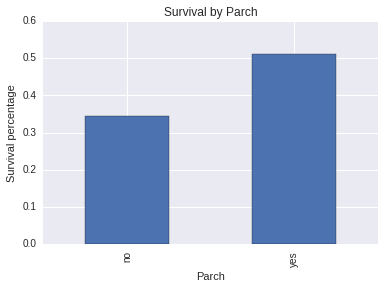

In [16]:
explore ('Parch')

Looks like passengers with parents and children were more likely to survive. Some of these passengers are probably children though, who were more likely to survive anyway.

Statistics:
count       891
unique        2
top       cheap
freq        731
Name: Fare, dtype: object


Distribution:
Fare
cheap        731
expensive    160
Name: Survived, dtype: int64




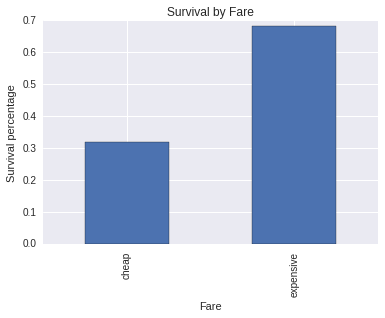

In [17]:
explore ('Fare')

Passengers with expensive tickets were far more likely to survive (they were 1st and 2nd class passengers, perhaps)

Statistics:
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


Distribution:
Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64




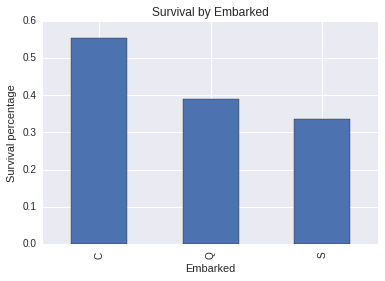

In [18]:
explore ('Embarked')

Passengers embarked on 'C' were more likely to survive (more 1st class passengers embarked there?)

Distribution:
Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64


Survival by Pclass and Sex:
Axes(0.125,0.125;0.775x0.775)


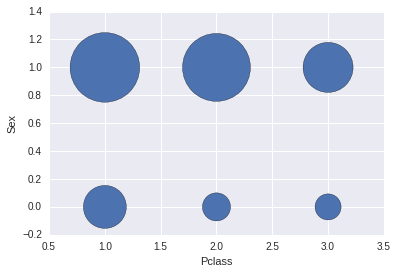

In [19]:
# Explore 2 variables simultaneously: "Pclass" and "Sex"
# Group by Pclass and Sex
groupby = train.groupby(by=['Pclass', 'Sex'])

# Print data distibution
print 'Distribution:'
print groupby.count()['Survived']
print '\n'

# Reset index to handle plotting more easily
df = groupby.mean()['Survived'].reset_index()

# Function to map "Sex" to ints
def map_sex(sex):
    if sex == 'female':
        return 1
    else:
        return 0

# Map Sex to ints
df['Sex'] = df['Sex'].apply(map_sex)

# Plot a
print "Survival by Pclass and Sex:"
print df.plot.scatter(x='Pclass', y='Sex', s=df['Survived']*5000)

Indeed, looks like sex played a huge role in determining survival. We see that even 3rd class females were more likely to survive than 1st class males